In [13]:
import numpy as np
import xarray as xr
import pandas as pd
import datetime


from datetime import timedelta, datetime, date
import calendar

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import os
import glob


In [14]:
xr.__version__


'0.16.1'

In [15]:
MASK_url = 'http://iridl.ldeo.columbia.edu/expert/SOURCES/.Models/.SubX/'
MASK_url1 = '/.hindcast/.pr'
MASK_url2 = '/dup/.SOURCES/.Features/.Political/.World/.Countries/.the_geom/objectid/135/VALUE/rasterize/dods'
url3 = '/Y/(23N)/(50N)/RANGEEDGES/X/(130W)/(60W)/RANGEEDGES'  

i_v_u ='EMC/.GEFS'
#                'GMAO/.GEOS_V2p1',
#                'NRL/.NESM',
#                'RSMAS/.CCSM4',
#                'NCEP/.CFSv2'
              #]

ds_mask = xr.open_dataset(MASK_url+i_v_u+MASK_url1+url3+MASK_url2)
ds_mask['the_geom']=xr.where(ds_mask.the_geom!=0, 1, 0)

ds_mask = ds_mask.rename({'X':'lon', 'Y':'lat'})
ds_mask = ds_mask.isel(objectid=0, drop=True)
ds_mask.coords['lon'] = ds_mask.lon+360.



In [16]:
# all_variables_3L.to_netcdf('all_variables_3L_aug2020.nc')

In [17]:
# Generate target time to check on L dependnece 
target_all = pd.date_range('1900-01-01', periods=365, freq='D')
target_all = [pd.DatetimeIndex([it]) for it in target_all]
# target_all

In [18]:
ds_clim_test_3d_all = xr.open_dataset('ds_clim_test_3d_all_aug2020.nc')
ds_clim_test_3d_all

<xarray.Dataset>
Dimensions:      (Lbeg: 6, lat: 28, lon: 71, quantile: 5, target_clim: 365)
Coordinates:
  * quantile     (quantile) float64 0.15 0.33 0.5 0.667 0.85
  * lon          (lon) float32 230.0 231.0 232.0 233.0 ... 298.0 299.0 300.0
  * lat          (lat) float32 50.0 49.0 48.0 47.0 46.0 ... 26.0 25.0 24.0 23.0
  * Lbeg         (Lbeg) object '14-33' '4-12' '4-22' '4-33' '6-14' '8-16'
  * target_clim  (target_clim) datetime64[ns] 1900-01-01 ... 1900-12-31
Data variables:
    pr_sfc       (target_clim, Lbeg, quantile, lat, lon) float64 ...

In [19]:
# trend_unstacked.to_netcdf('harmonics_from_quantiles_cauchy_aug2020.nc')
# trend_unstackedroll.to_netcdf('harmonics_from_quantiles_cauchy_smoothedspace_aug2020.nc')
# trend_unstacked1.to_netcdf('harmonics_from_quantiles_soft_aug2020.nc')


In [20]:
# smooth_clim_cauchy.to_netcdf('smooth_clim_cauchy_oct2020.nc')

In [21]:
smooth_clim_cauchy = xr.open_dataset('smooth_clim_cauchy_oct2020.nc')
smooth_clim_cauchy

<xarray.Dataset>
Dimensions:      (Lbeg: 6, lat: 28, lon: 71, target_clim: 365)
Coordinates:
  * Lbeg         (Lbeg) object '14-33' '4-12' '4-22' '4-33' '6-14' '8-16'
  * lat          (lat) float64 23.0 24.0 25.0 26.0 27.0 ... 47.0 48.0 49.0 50.0
  * lon          (lon) float64 230.0 231.0 232.0 233.0 ... 298.0 299.0 300.0
  * target_clim  (target_clim) datetime64[ns] 1900-01-01 ... 1900-12-31
Data variables:
    pr_sfc       (target_clim, Lbeg, lat, lon) float64 ...

In [22]:
import cmocean
cmap = cmocean.cm.deep


In [23]:
ds_clim_test_3d_all = ds_clim_test_3d_all.rename({'Lbeg':'L_range'})
smooth_clim_cauchy = smooth_clim_cauchy.rename({'Lbeg':'L_range'})

In [24]:
ds_clim_test_3d_all

<xarray.Dataset>
Dimensions:      (L_range: 6, lat: 28, lon: 71, quantile: 5, target_clim: 365)
Coordinates:
  * quantile     (quantile) float64 0.15 0.33 0.5 0.667 0.85
  * lon          (lon) float32 230.0 231.0 232.0 233.0 ... 298.0 299.0 300.0
  * lat          (lat) float32 50.0 49.0 48.0 47.0 46.0 ... 26.0 25.0 24.0 23.0
  * L_range      (L_range) object '14-33' '4-12' '4-22' '4-33' '6-14' '8-16'
  * target_clim  (target_clim) datetime64[ns] 1900-01-01 ... 1900-12-31
Data variables:
    pr_sfc       (target_clim, L_range, quantile, lat, lon) float64 ...

KeyboardInterrupt: 

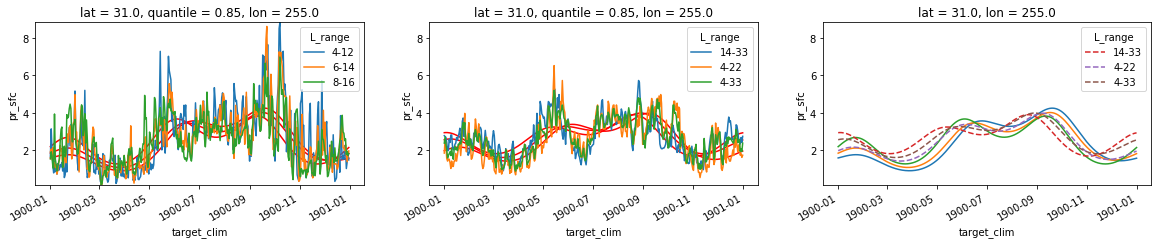

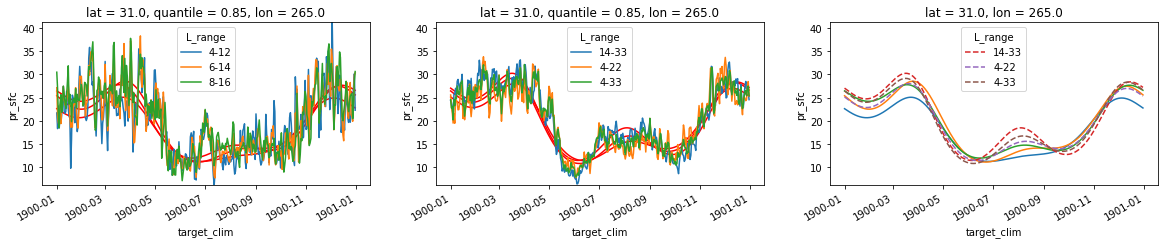

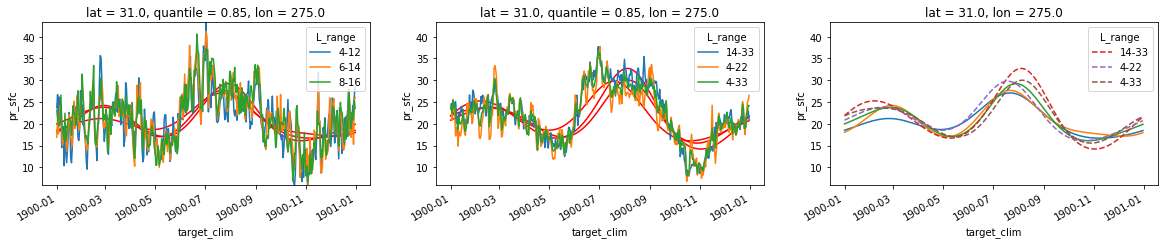

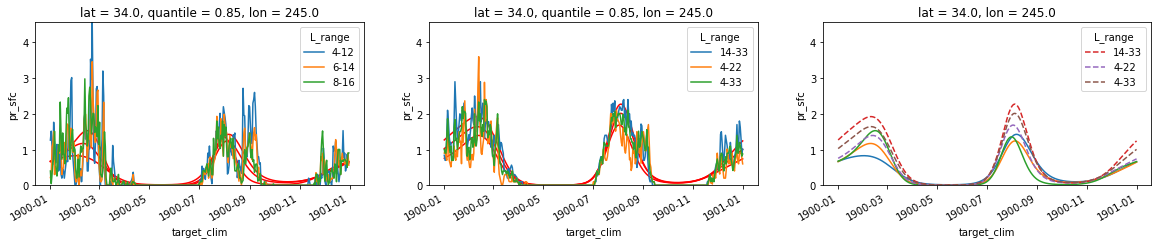

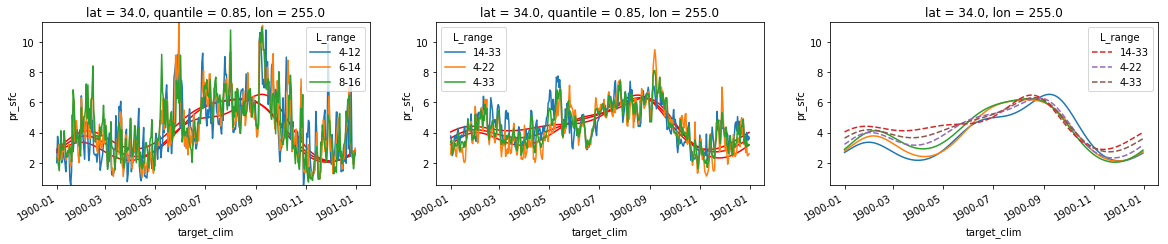

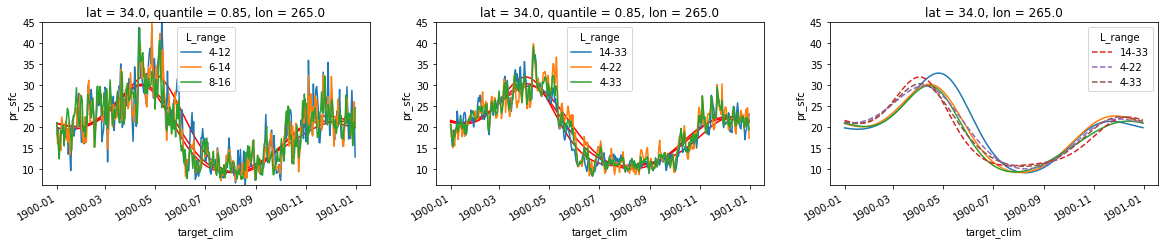

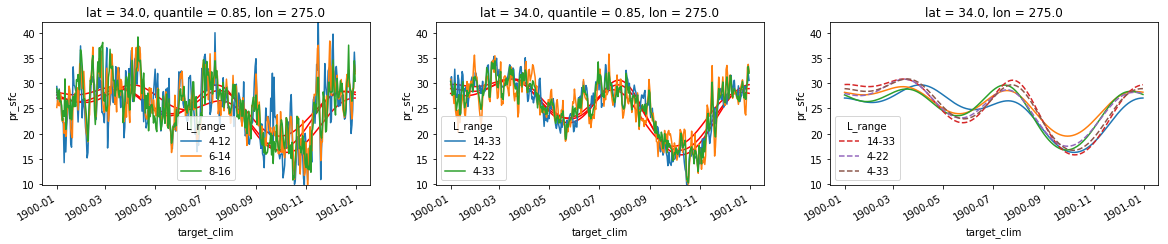

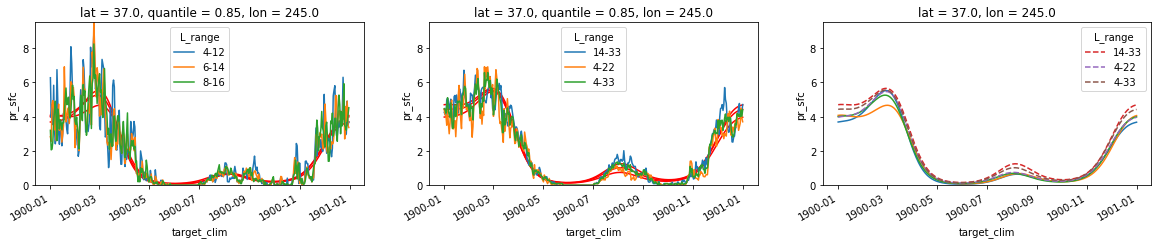

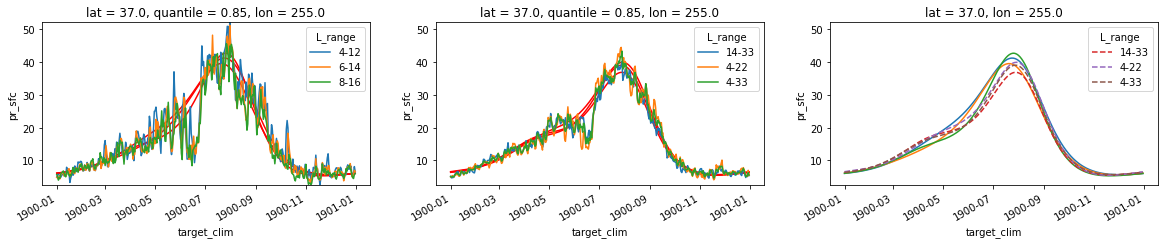

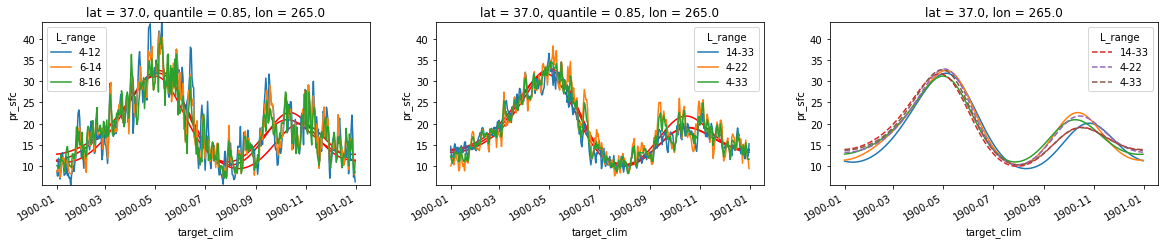

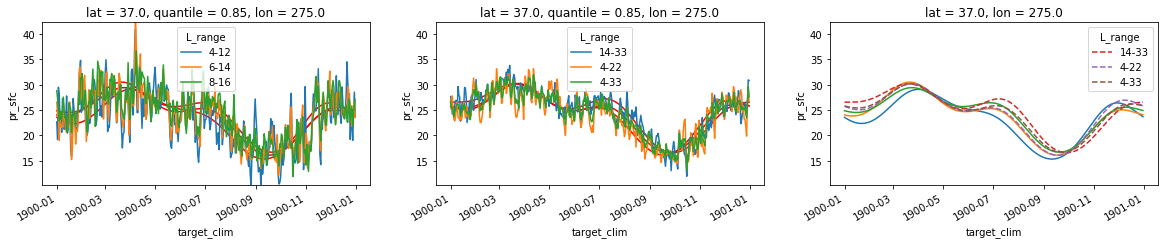

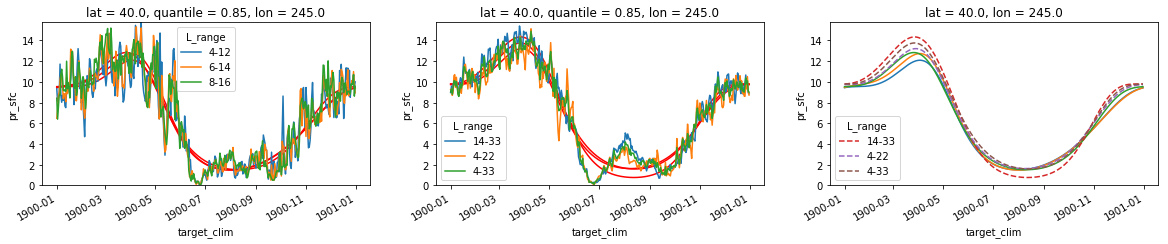

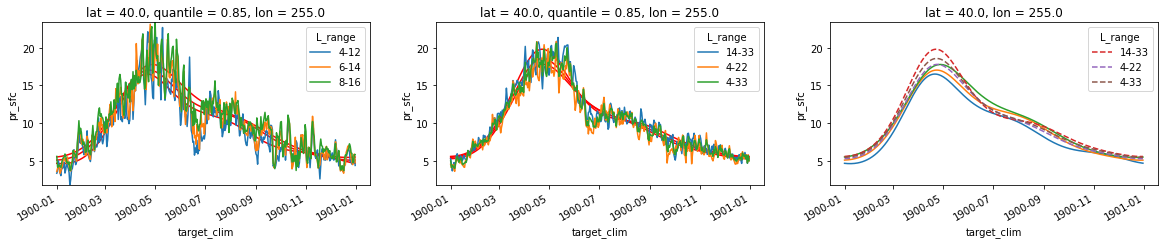

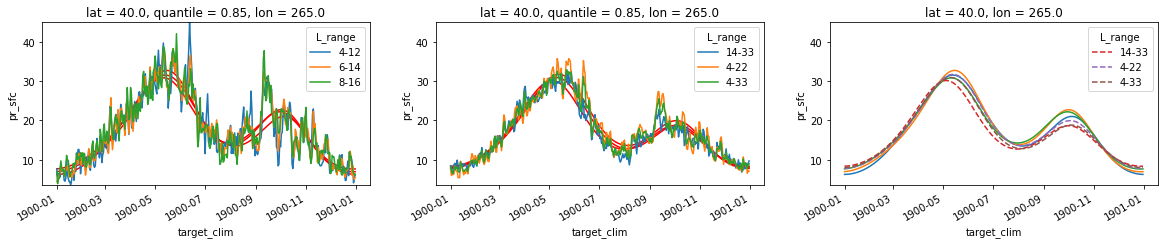

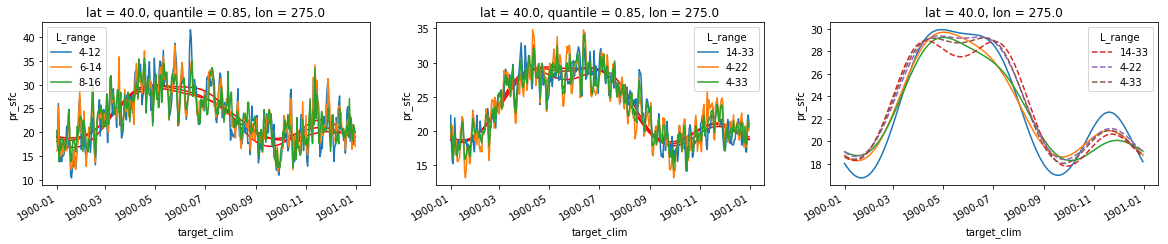

In [13]:
for ilat in np.arange(25,51,3):
    for ilon in np.arange(235,301,10):
        if np.sum(np.isnan(ds_clim_test_3d_all.where(ds_mask.the_geom>0).pr_sfc[:,:,-1,:,:].sel(lat=ilat, lon=ilon).values))==0:
            plt.figure(figsize=(20,3))
            ax1 = plt.subplot(131)
#             smooth_clim_soft.pr_sfc[:,:,:,:].sel(lat=ilat, lon=ilon).plot.line('b',x='target_clim')
            smooth_clim_cauchy.isel(L_range=np.array([1,4,5])).pr_sfc[:,:,:,:].sel(lat=ilat, lon=ilon).plot.line('r',ax=ax1, x='target_clim')
            ds_clim_test_3d_all.isel(L_range=np.array([1,4,5])).where(ds_mask.the_geom>0).pr_sfc[:,:,-1,:,:].sel(lat=ilat, lon=ilon).plot.line(ax=ax1, x='target_clim')

            ax2 = plt.subplot(132)
#             smooth_clim_soft.pr_sfc[:,:,:,:].sel(lat=ilat, lon=ilon).plot.line('b',x='target_clim')
            smooth_clim_cauchy.isel(L_range=np.array([0,2,3])).pr_sfc[:,:,:,:].sel(lat=ilat, lon=ilon).plot.line('r',ax=ax2, x='target_clim')
            ds_clim_test_3d_all.isel(L_range=np.array([0,2,3])).where(ds_mask.the_geom>0).pr_sfc[:,:,-1,:,:].sel(lat=ilat, lon=ilon).plot.line(ax=ax2, x='target_clim')
        
            ax3 = plt.subplot(133)
            smooth_clim_cauchy.isel(L_range=np.array([1,4,5])).pr_sfc[:,:,:,:].sel(lat=ilat, lon=ilon).plot.line(ax=ax3, x='target_clim')
            smooth_clim_cauchy.isel(L_range=np.array([0,2,3])).pr_sfc[:,:,:,:].sel(lat=ilat, lon=ilon).plot.line('--',ax=ax3, x='target_clim')
            ax1.set_ylim((ds_clim_test_3d_all.isel(L_range=np.array([1,4,5])).where(ds_mask.the_geom>0).pr_sfc[:,:,-1,:,:].sel(lat=ilat, lon=ilon).min().values*0.9999999,
                         ds_clim_test_3d_all.isel(L_range=np.array([1,4,5])).where(ds_mask.the_geom>0).pr_sfc[:,:,-1,:,:].sel(lat=ilat, lon=ilon).max().values*1.000000001))
            ax2.set_ylim((ds_clim_test_3d_all.isel(L_range=np.array([1,4,5])).where(ds_mask.the_geom>0).pr_sfc[:,:,-1,:,:].sel(lat=ilat, lon=ilon).min().values*0.9999999,
                         ds_clim_test_3d_all.isel(L_range=np.array([1,4,5])).where(ds_mask.the_geom>0).pr_sfc[:,:,-1,:,:].sel(lat=ilat, lon=ilon).max().values*1.000000001))
            ax3.set_ylim((ds_clim_test_3d_all.isel(L_range=np.array([1,4,5])).where(ds_mask.the_geom>0).pr_sfc[:,:,-1,:,:].sel(lat=ilat, lon=ilon).min().values*0.9999999,
                         ds_clim_test_3d_all.isel(L_range=np.array([1,4,5])).where(ds_mask.the_geom>0).pr_sfc[:,:,-1,:,:].sel(lat=ilat, lon=ilon).max().values*1.000000001))
            
            
            
            

In [103]:
kwargs={'histtype':'step'}

/local/ERAin/lib/python3.6/site-packages/xarray/plot/plot.py:441: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  primitive = ax.hist(no_nan, **kwargs)
/local/ERAin/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':
/local/ERAin/lib/python3.6/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensu

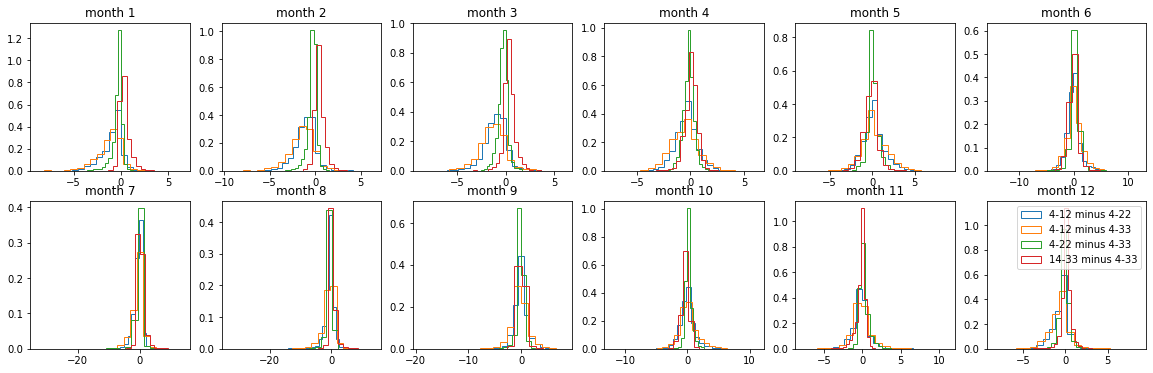

In [110]:
sg = (smooth_clim_cauchy.pr_sfc[:,1]-smooth_clim_cauchy.pr_sfc[:,2]).groupby('target_clim.month')
sg1 = (smooth_clim_cauchy.pr_sfc[:,1]-smooth_clim_cauchy.pr_sfc[:,3]).groupby('target_clim.month')
sg2 = (smooth_clim_cauchy.pr_sfc[:,2]-smooth_clim_cauchy.pr_sfc[:,3]).groupby('target_clim.month')
sg3 = (smooth_clim_cauchy.pr_sfc[:,0]-smooth_clim_cauchy.pr_sfc[:,3]).groupby('target_clim.month')
plt.figure(figsize=(20,6))
for k,isg in sg:
    ax = plt.subplot(2,6,k)
    isg.plot.hist(ax, bins=20, normed=True,**kwargs, label='4-12 minus 4-22')
    ax.set_title('month '+np.str(k))
    ax.set_xlabel('')
for k,isg in sg1:
    ax = plt.subplot(2,6,k)
    isg.plot.hist(ax, bins=20, normed=True,**kwargs, label='4-12 minus 4-33')
    ax.set_title('month '+np.str(k))
    ax.set_xlabel('')
for k,isg in sg2:
    ax = plt.subplot(2,6,k)
    isg.plot.hist(ax, bins=20, normed=True,**kwargs, label='4-22 minus 4-33')
    ax.set_title('month '+np.str(k))
    ax.set_xlabel('')
for k,isg in sg3:
    ax = plt.subplot(2,6,k)
    isg.plot.hist(ax, bins=20, normed=True,**kwargs, label='14-33 minus 4-33')
    ax.set_title('month '+np.str(k))
    ax.set_xlabel('')
ax.legend()

/local/ERAin/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


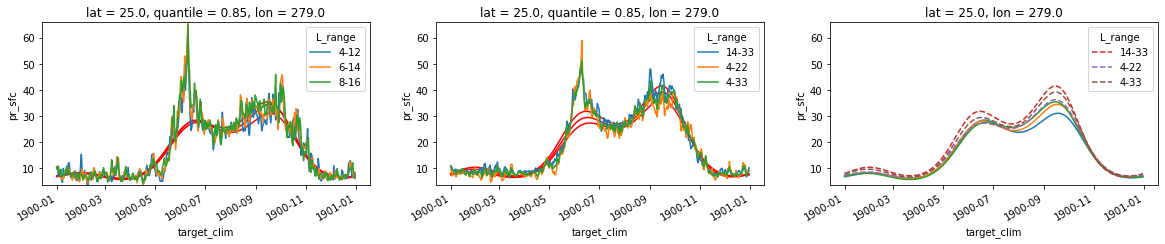

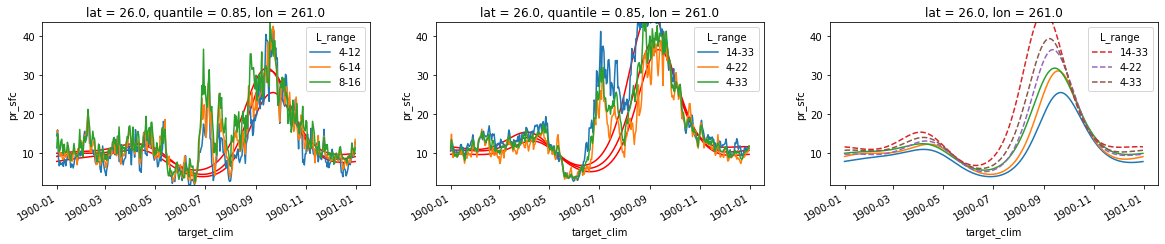

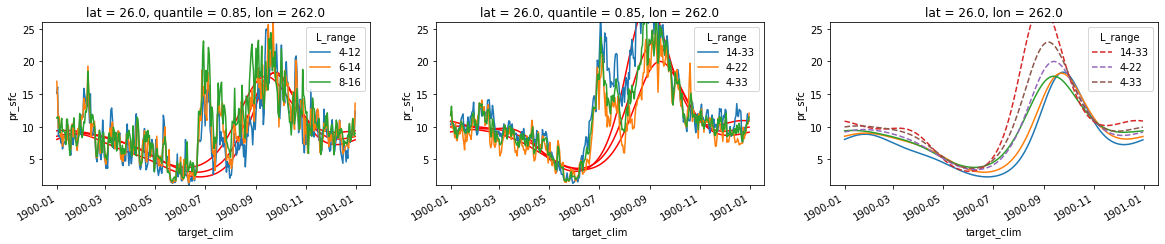

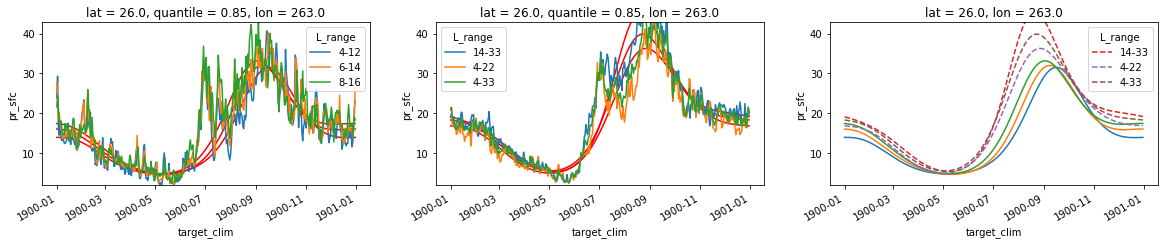

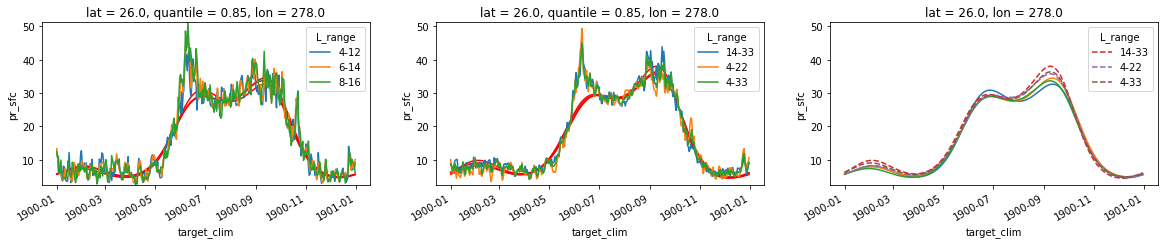

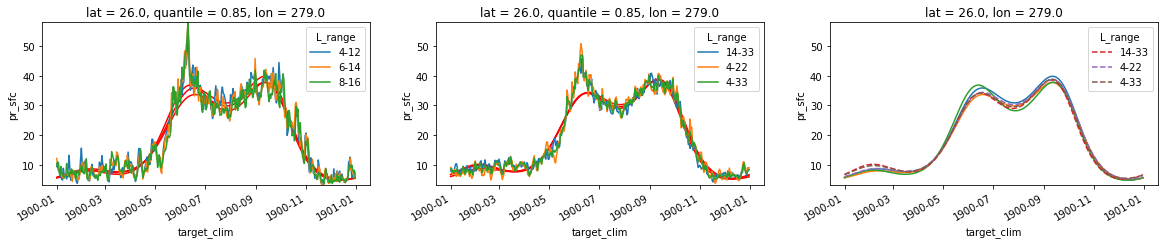

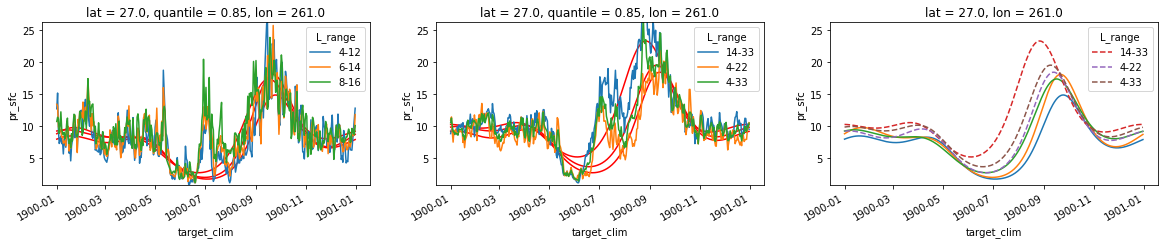

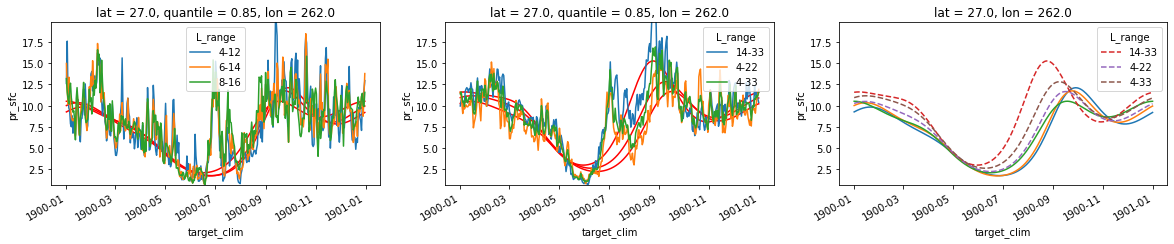

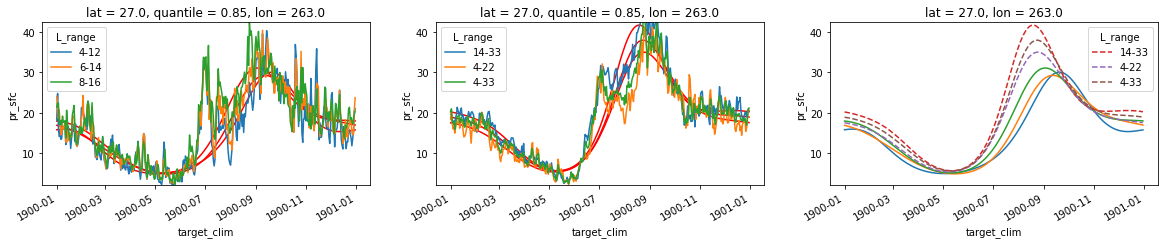

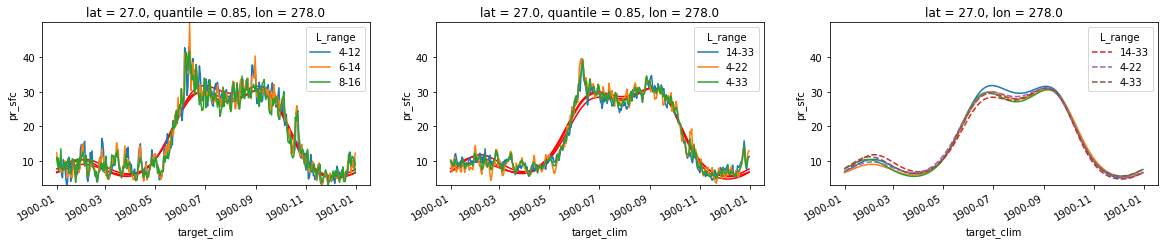

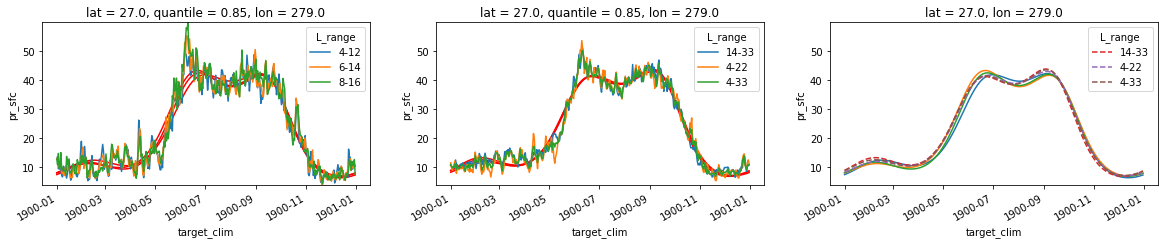

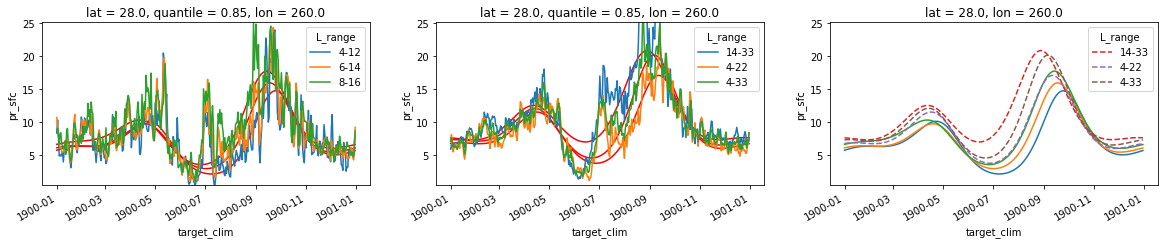

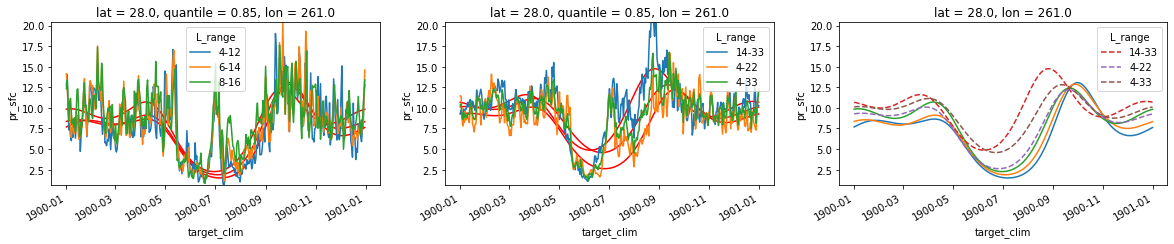

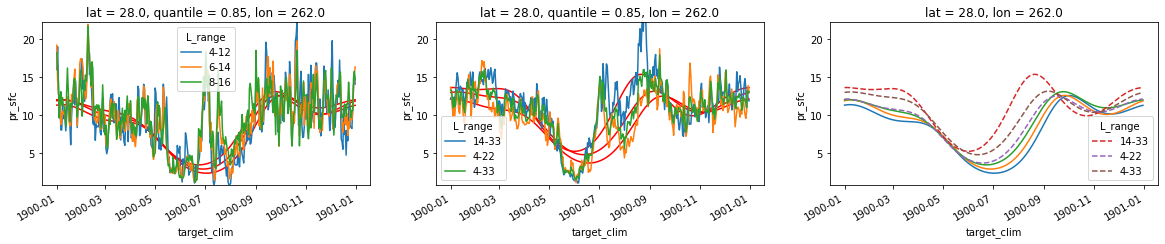

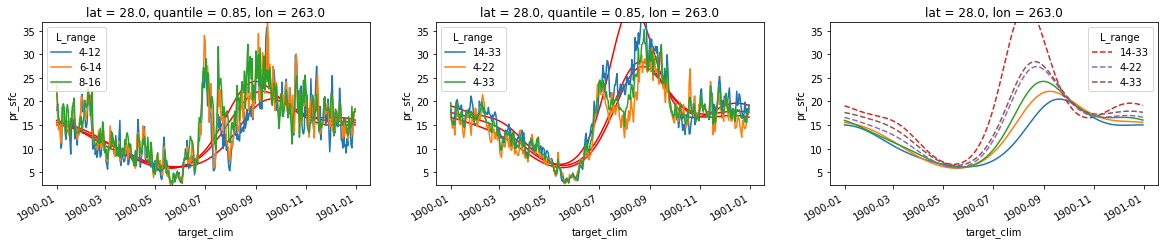

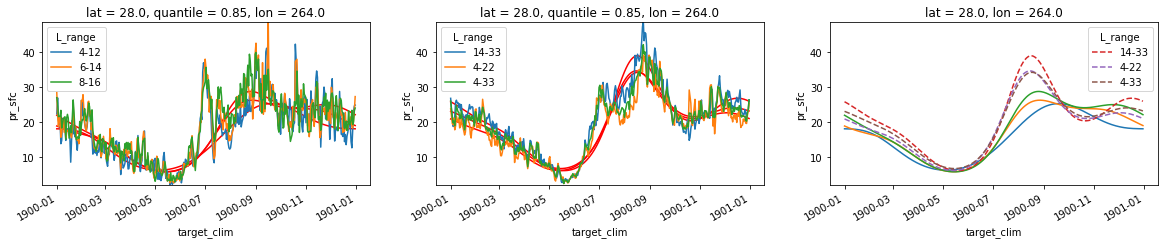

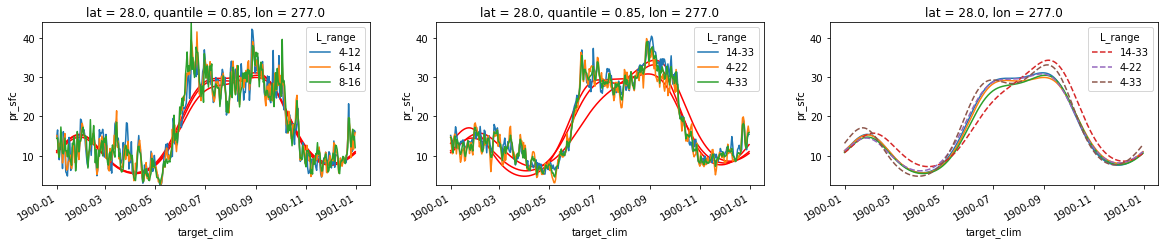

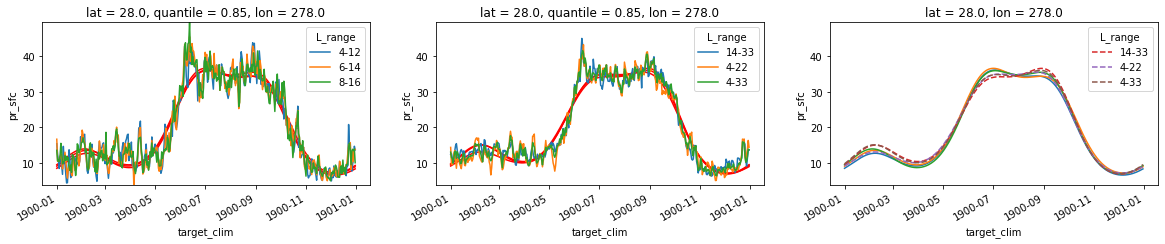

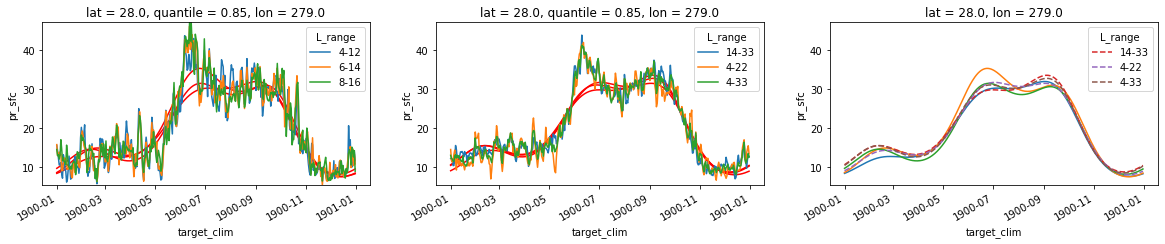

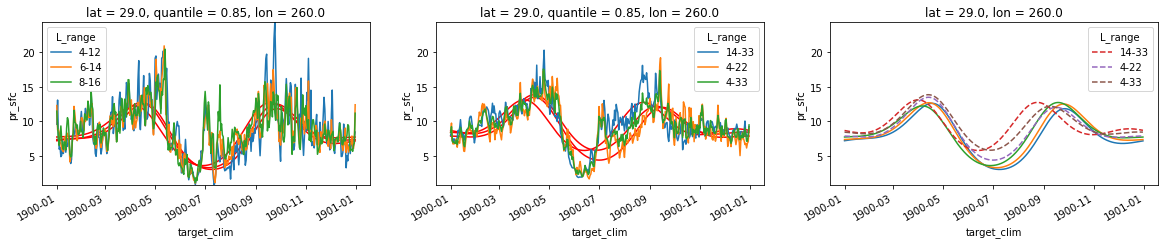

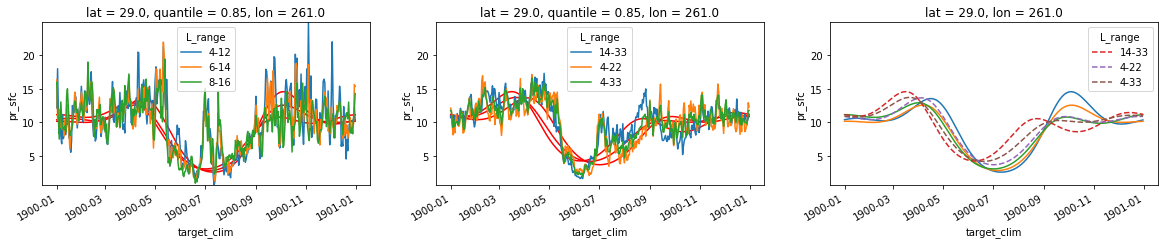

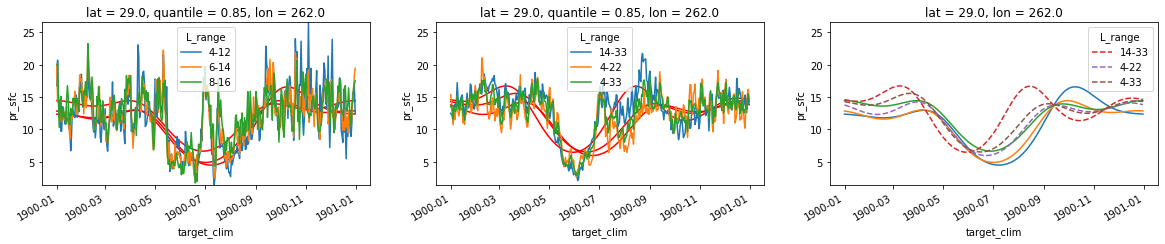

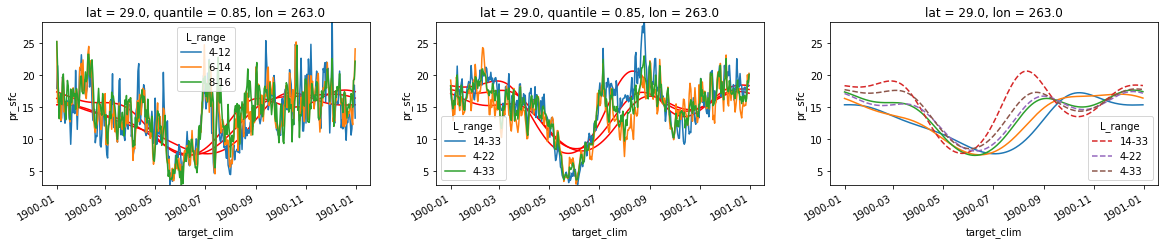

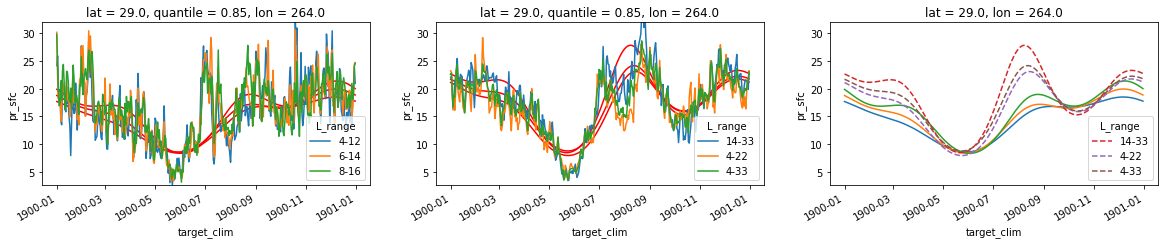

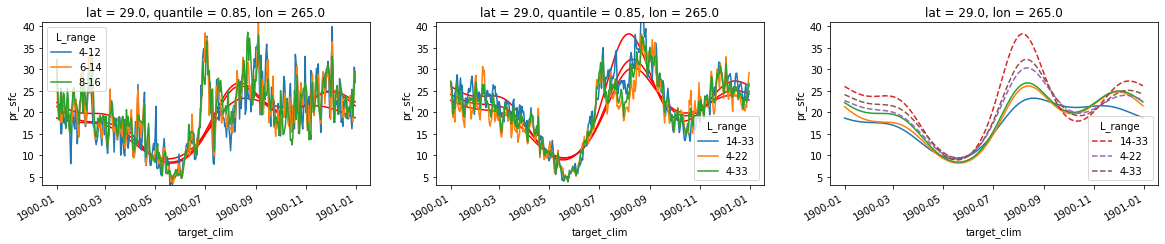

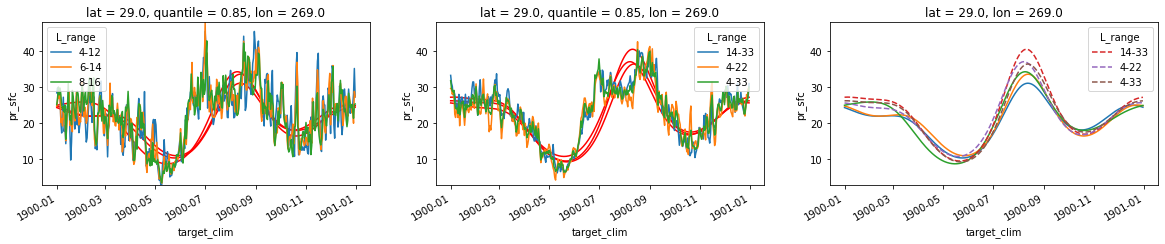

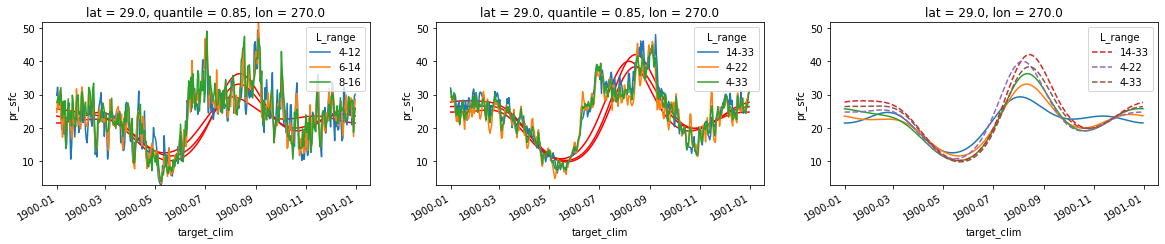

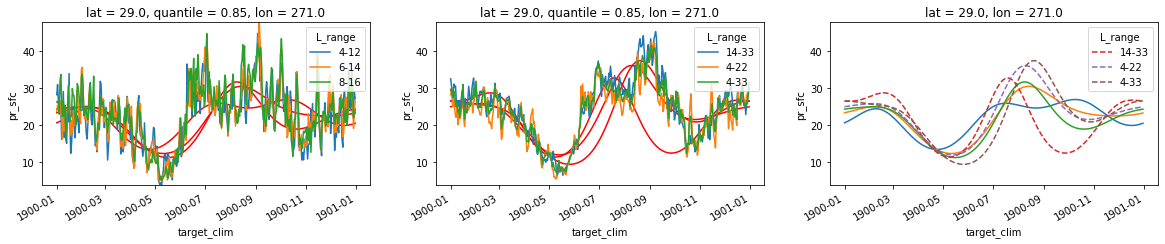

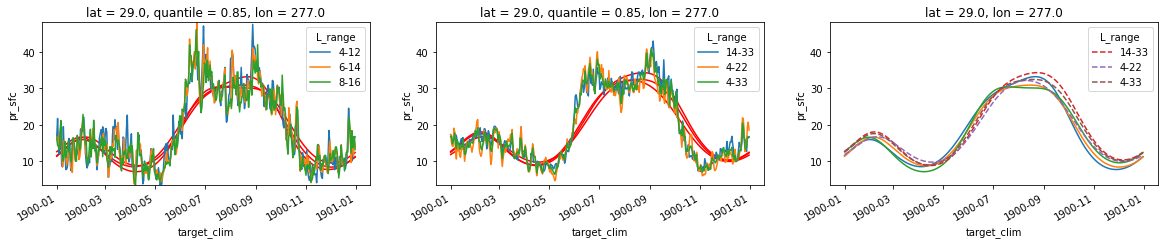

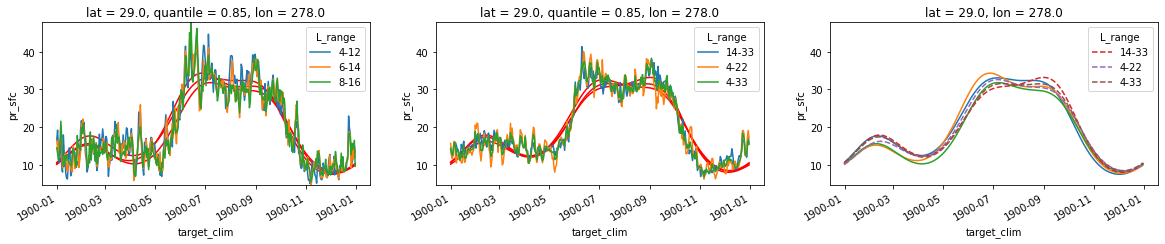

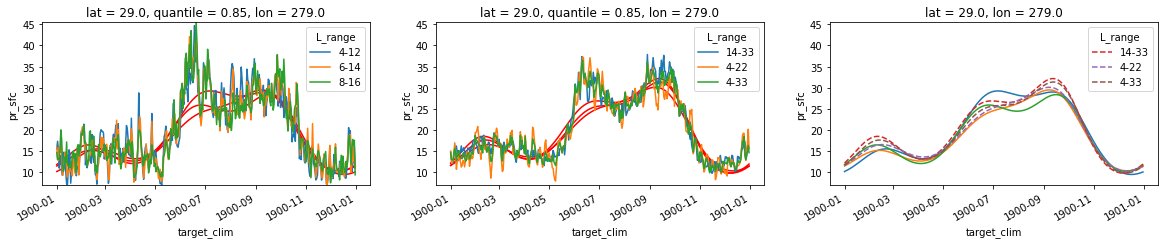

In [29]:
for ilat in np.arange(25,30,1):
    for ilon in np.arange(260,280,1):
        if np.sum(np.isnan(ds_clim_test_3d_all.where(ds_mask.the_geom>0).pr_sfc[:,:,-1,:,:].sel(lat=ilat, lon=ilon).values))==0:
            plt.figure(figsize=(20,3))
            ax1 = plt.subplot(131)
#             smooth_clim_soft.pr_sfc[:,:,:,:].sel(lat=ilat, lon=ilon).plot.line('b',x='target_clim')
            smooth_clim_cauchy.isel(L_range=np.array([1,4,5])).pr_sfc[:,:,:,:].sel(lat=ilat, lon=ilon).plot.line('r',ax=ax1, x='target_clim')
            ds_clim_test_3d_all.isel(L_range=np.array([1,4,5])).where(ds_mask.the_geom>0).pr_sfc[:,:,-1,:,:].sel(lat=ilat, lon=ilon).plot.line(ax=ax1, x='target_clim')

            ax2 = plt.subplot(132)
#             smooth_clim_soft.pr_sfc[:,:,:,:].sel(lat=ilat, lon=ilon).plot.line('b',x='target_clim')
            smooth_clim_cauchy.isel(L_range=np.array([0,2,3])).pr_sfc[:,:,:,:].sel(lat=ilat, lon=ilon).plot.line('r',ax=ax2, x='target_clim')
            ds_clim_test_3d_all.isel(L_range=np.array([0,2,3])).where(ds_mask.the_geom>0).pr_sfc[:,:,-1,:,:].sel(lat=ilat, lon=ilon).plot.line(ax=ax2, x='target_clim')
        
            ax3 = plt.subplot(133)
            smooth_clim_cauchy.isel(L_range=np.array([1,4,5])).pr_sfc[:,:,:,:].sel(lat=ilat, lon=ilon).plot.line(ax=ax3, x='target_clim')
            smooth_clim_cauchy.isel(L_range=np.array([0,2,3])).pr_sfc[:,:,:,:].sel(lat=ilat, lon=ilon).plot.line('--',ax=ax3, x='target_clim')
            ax1.set_ylim((ds_clim_test_3d_all.isel(L_range=np.array([1,4,5])).where(ds_mask.the_geom>0).pr_sfc[:,:,-1,:,:].sel(lat=ilat, lon=ilon).min().values*0.9999999,
                         ds_clim_test_3d_all.isel(L_range=np.array([1,4,5])).where(ds_mask.the_geom>0).pr_sfc[:,:,-1,:,:].sel(lat=ilat, lon=ilon).max().values*1.000000001))
            ax2.set_ylim((ds_clim_test_3d_all.isel(L_range=np.array([1,4,5])).where(ds_mask.the_geom>0).pr_sfc[:,:,-1,:,:].sel(lat=ilat, lon=ilon).min().values*0.9999999,
                         ds_clim_test_3d_all.isel(L_range=np.array([1,4,5])).where(ds_mask.the_geom>0).pr_sfc[:,:,-1,:,:].sel(lat=ilat, lon=ilon).max().values*1.000000001))
            ax3.set_ylim((ds_clim_test_3d_all.isel(L_range=np.array([1,4,5])).where(ds_mask.the_geom>0).pr_sfc[:,:,-1,:,:].sel(lat=ilat, lon=ilon).min().values*0.9999999,
                         ds_clim_test_3d_all.isel(L_range=np.array([1,4,5])).where(ds_mask.the_geom>0).pr_sfc[:,:,-1,:,:].sel(lat=ilat, lon=ilon).max().values*1.000000001))
            
            
 

In [57]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
from matplotlib.image import imread
import cartopy.io.shapereader as shpreader
shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m',
                                         category='cultural', name=shapename)



Text(0.5, 1.0, 'Forecast')

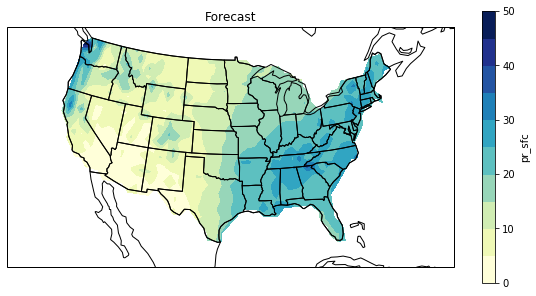

In [59]:
ttp = ds_clim_test_3d_all.sel(L_range='14-33').sel(quantile=0.85).mean('target_clim').pr_sfc.where(ds_mask.the_geom>0.1)
# ttp.plot.contourf(cmap='YlGnBu', levels=11, vmin=0, vmax=50)
plt.figure(figsize=(10,5))
ax = plt.subplot(111,projection=ccrs.LambertConformal(central_longitude=-95, central_latitude=45) )
ttp.plot.contourf(cmap='YlGnBu', levels=11, vmin=0, vmax=50, 
                 ax = ax, origin='upper', transform=ccrs.PlateCarree(),
          extent=[-180, 180, -90, 90])
# ax.stock_img()
ax.coastlines()
ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())
ax.add_feature(cfeature.BORDERS)
ax.add_geometries(
shpreader.Reader(states_shp).geometries(),
ccrs.PlateCarree(),
facecolor='none', edgecolor='k')
plt.title('Forecast')
     



Text(0.5, 1.0, 'Harmonics')

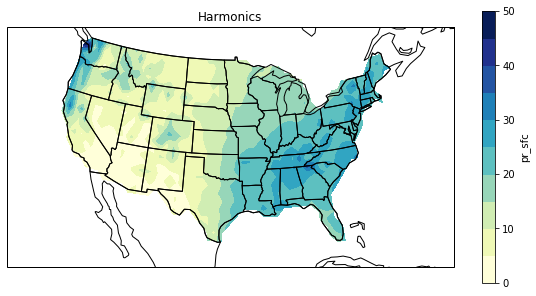

In [60]:
ttp = smooth_clim_cauchy.sel(L_range='14-33').mean('target_clim').pr_sfc.where(ds_mask.the_geom>0.1)
# ttp.plot.contourf(cmap='YlGnBu', levels=11, vmin=0, vmax=50)
plt.figure(figsize=(10,5))
ax = plt.subplot(111,projection=ccrs.LambertConformal(central_longitude=-95, central_latitude=45) )
ttp.plot.contourf(cmap='YlGnBu', levels=11, vmin=0, vmax=50, 
                 ax = ax, origin='upper', transform=ccrs.PlateCarree(),
          extent=[-180, 180, -90, 90])
# ax.stock_img()
ax.coastlines()
ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())
ax.add_feature(cfeature.BORDERS)
ax.add_geometries(
shpreader.Reader(states_shp).geometries(),
ccrs.PlateCarree(),
facecolor='none', edgecolor='k')
plt.title('Harmonics')


/local/ERAin/lib/python3.6/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Text(0.5, 1.0, 'Forecast - Harmonics')

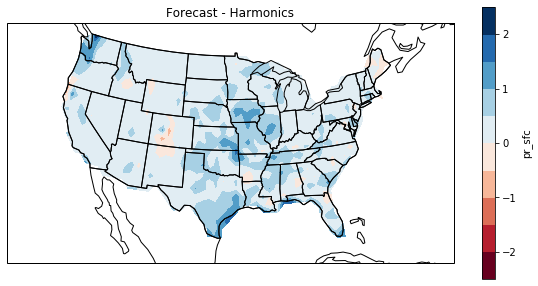

In [41]:
ttp = ds_clim_test_3d_all.sel(L_range='4-12').sel(quantile=0.85).mean('target_clim').pr_sfc.where(ds_mask.the_geom>0.1)
ttp1 = smooth_clim_cauchy.sel(L_range='4-12').mean('target_clim').pr_sfc.where(ds_mask.the_geom>0.1)
plt.figure(figsize=(10,5))
ax = plt.subplot(111,projection=ccrs.LambertConformal(central_longitude=-95, central_latitude=45) )
(ttp-ttp1).plot.contourf(cmap='RdBu', levels=11, 
                 ax = ax, origin='upper', transform=ccrs.PlateCarree(),
          extent=[-180, 180, -90, 90])
# ax.stock_img()
ax.coastlines()
ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())
ax.add_feature(cfeature.BORDERS)
ax.add_geometries(
shpreader.Reader(states_shp).geometries(),
ccrs.PlateCarree(),
facecolor='none', edgecolor='k')
plt.title('Forecast - Harmonics')


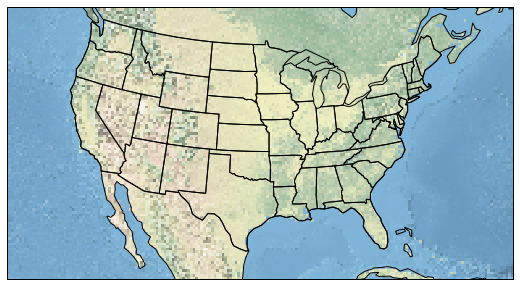

In [18]:

plt.figure(figsize=(10,5))
ax = plt.subplot(111,projection=ccrs.LambertConformal(central_longitude=-95, central_latitude=45) )
ax.imshow(imread('NE1_50M_SR_W/NE1_50M_SR_W.tif'), origin='upper', transform=ccrs.PlateCarree(),
          extent=[-180, 180, -90, 90])
# ax.stock_img()
ax.coastlines()
ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())
ax.add_feature(cfeature.BORDERS)
ax.add_geometries(
shpreader.Reader(states_shp).geometries(),
ccrs.PlateCarree(),
facecolor='none', edgecolor='k')
#        



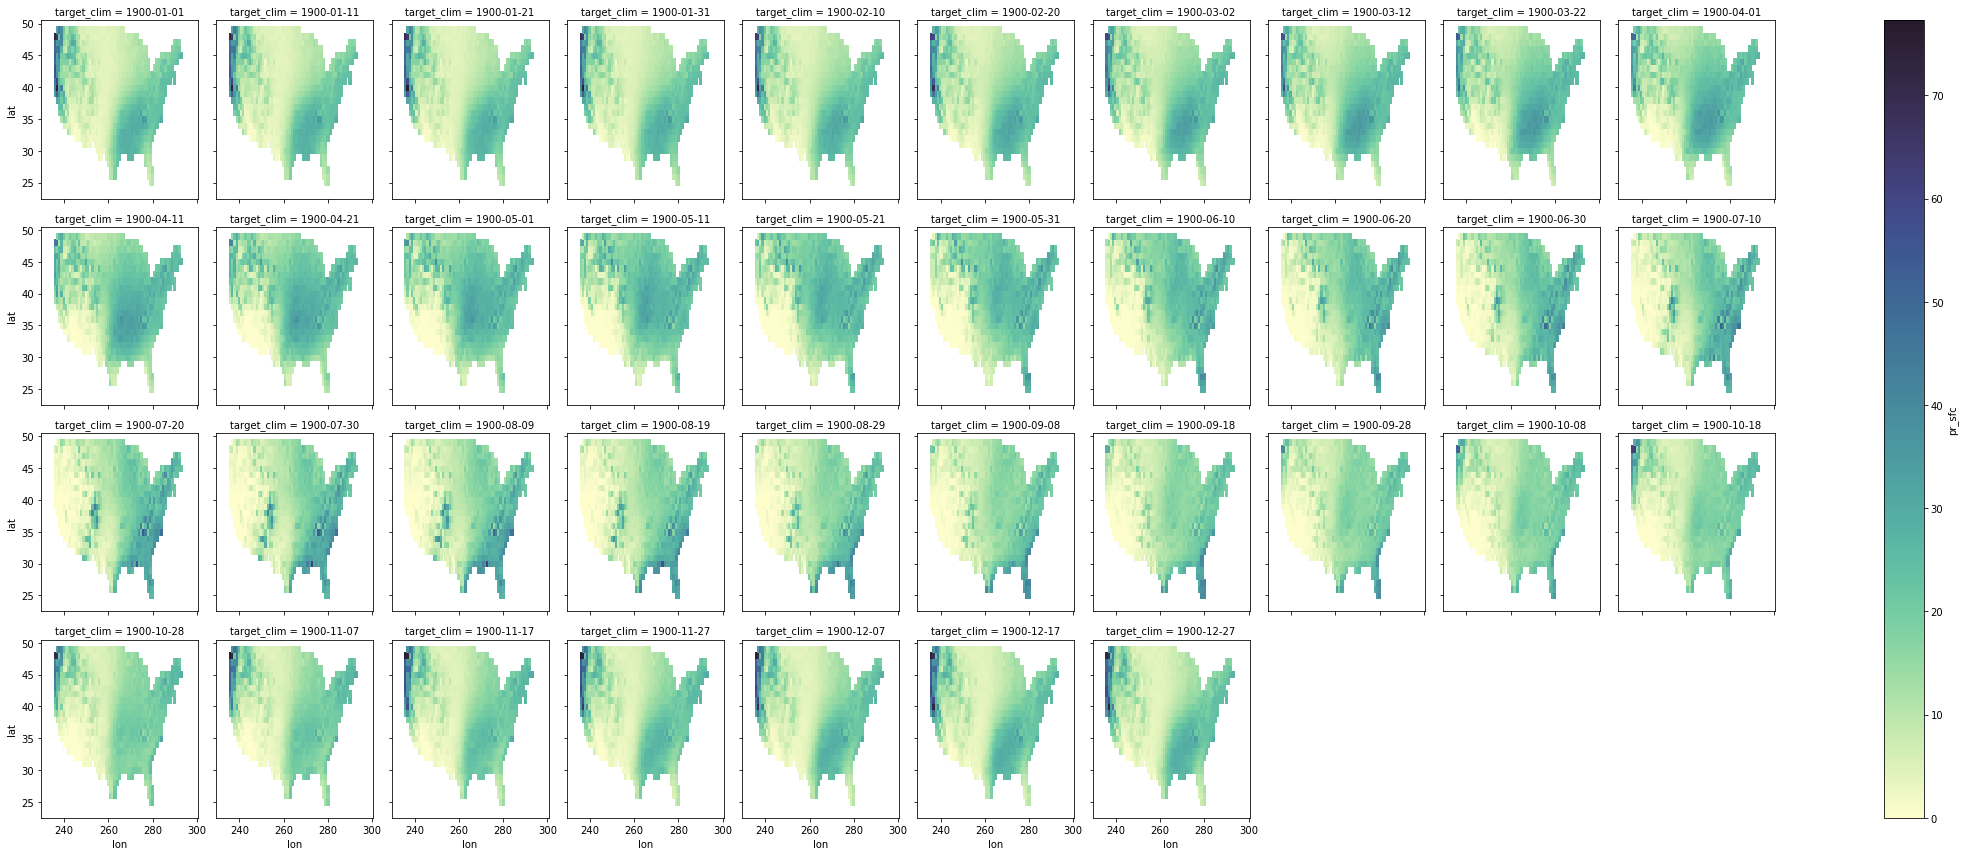

In [111]:
smooth_clim_cauchy.pr_sfc[::10,3].plot(col='target_clim',col_wrap=10, cmap=cmap)

In [115]:
smooth_clim_cauchy.pr_sfc.isel(Lbeg=3)

<xarray.DataArray 'pr_sfc' (target_clim: 365, lat: 28, lon: 71)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan

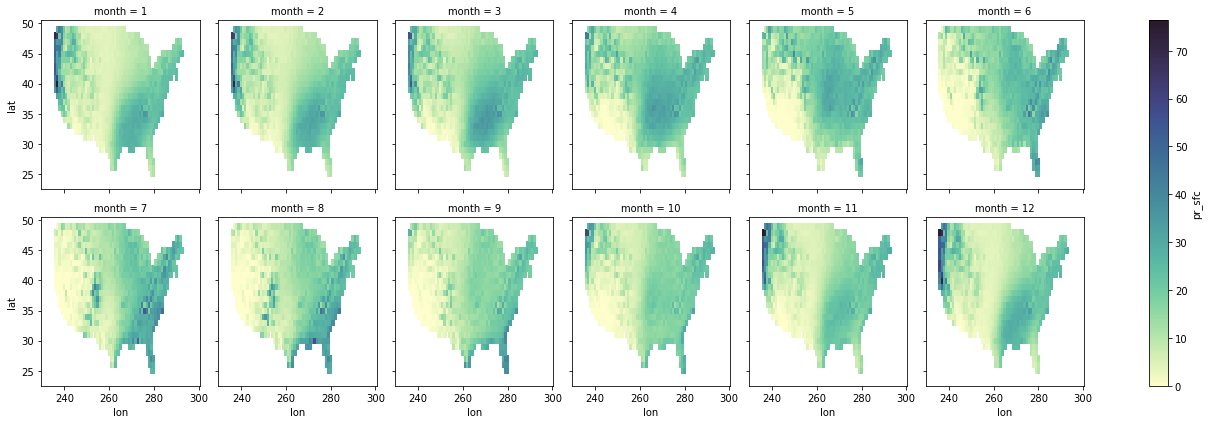

In [117]:
smooth_clim_cauchy.pr_sfc.isel(Lbeg=3).groupby('target_clim.month').mean().plot(col='month',col_wrap=6, cmap=cmap)

In [157]:
smooth_clim_cauchy.to_netcdf('smooth_clim_cauchy_aug2020.nc')

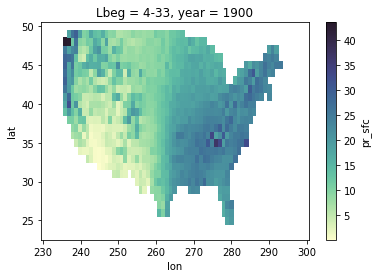

In [118]:
smooth_clim_cauchy.pr_sfc.isel(Lbeg=3).groupby('target_clim.year').mean().plot( cmap=cmap)

In [153]:
smooth_clim.coords

Coordinates:
  * Lbeg         (Lbeg) object '14-33' '4-12' '4-22' '4-33' '6-14' '8-16'
  * lat          (lat) float64 23.0 24.0 25.0 26.0 27.0 ... 47.0 48.0 49.0 50.0
  * lon          (lon) float64 230.0 231.0 232.0 233.0 ... 298.0 299.0 300.0
  * target_clim  (target_clim) datetime64[ns] 1900-01-01 ... 1900-12-31

In [2]:
all_variables_3L = xr.open_dataset('all_variables_3L_aug2020.nc')
all_variables_T3 = all_variables_3L.stack(St=('S','time'))
all_variables_T3 = all_variables_T3.swap_dims({'St':'target_time'})
all_variables_T3 = all_variables_T3.unstack()

In [169]:
smooth_data

<xarray.Dataset>
Dimensions:      (L_range: 6, lat: 28, lon: 71, target_clim: 1)
Coordinates:
  * L_range      (L_range) object '14-33' '4-12' '4-22' '4-33' '6-14' '8-16'
  * lat          (lat) float64 23.0 24.0 25.0 26.0 27.0 ... 47.0 48.0 49.0 50.0
  * lon          (lon) float64 230.0 231.0 232.0 233.0 ... 298.0 299.0 300.0
  * target_clim  (target_clim) datetime64[ns] 1900-12-31
Data variables:
    pr_sfc       (target_clim, L_range, lat, lon) float64 nan nan ... nan nan

In [172]:
# looping through the target dates for climatologies
import warnings
warnings.filterwarnings("ignore")

check_85 = []
for iT in target_all:
    # extract values that correspond to the target dates
    temp = all_variables_T3.where((all_variables_T3.target_time.dt.month==iT.month.values[0])&
                              (all_variables_T3.target_time.dt.day==iT.day.values[0]), drop=True)
    smooth_data = smooth_clim_cauchy.where((smooth_clim_cauchy.target_clim.dt.month==iT.month.values[0])&
                              (smooth_clim_cauchy.target_clim.dt.day==iT.day.values[0]), drop=True)
    # bits to extract the S and t of each target_time
    y_ls = [y for (x,y) in temp.St.values]
    y_arr = np.array(y_ls)
    # loop through the 3 types of lead times
    # I have the -1 because of the way the timedelta is centered at 0 day and 12hours for day 1
#     for different_lead1, different_lead2 in zip(np.array([1,7,13])-1, np.array([5,11,17])-1 ):
    check_85b  = []
    for different_lead1, different_lead2 in zip(np.array([8,10,12])-1, np.array([10,12,14])-1 ):
#         print(y_arr[(y_arr>np.timedelta64(different_lead1,'D'))&(y_arr<np.timedelta64(different_lead2,'D'))])
        temp2 = temp.sel(target_time=
                         (y_arr>np.timedelta64(different_lead1,'D'))&(y_arr<np.timedelta64(different_lead2,'D')))
        
        smooth_data2 = smooth_data.isel(L_range=3)
        #to match coordinates of the data
        smooth_data2 = smooth_data2.rename({'target_clim':'target_time'})
        diff  = temp2 - smooth_data2.isel(target_time=0) 
        diffs = diff.stack(values = ['M','target_time'])
        diffbool = xr.where(diffs.pr_sfc.where(ds_mask.the_geom>0)<0, 0,1)
        diffbool = diffbool.where(ds_mask.the_geom>0).sum('values')/diffbool.where(ds_mask.the_geom>0).count('values')
#         diffbool = diffbool.expand_dims('L_range')
        diffbool = diffbool.drop('L_range')
        diffbool = diffbool.expand_dims('target_time')
        diffbool.coords['target_time']= np.atleast_1d(iT)
        diffbool = diffbool.expand_dims('forecast_L')
#         diffbool.coords['forecast_L'] = 'forecast_L', [np.str(different_lead1+1)+'-'+np.str(different_lead2+1)] #np.atleast_1d(different_lead1+1)
        diffbool.coords['forecast_L'] = 'forecast_L', np.atleast_1d(different_lead1+1)
#       
        check_85b.append(diffbool)
    check_85b1 = xr.concat(check_85b, dim='forecast_L')    
    check_85.append(check_85b1)
# check_85 = xr.combine_by_coords(check_85)    
check_85_L3 = xr.concat(check_85, dim='target_time')

<Figure size 1440x720 with 0 Axes>

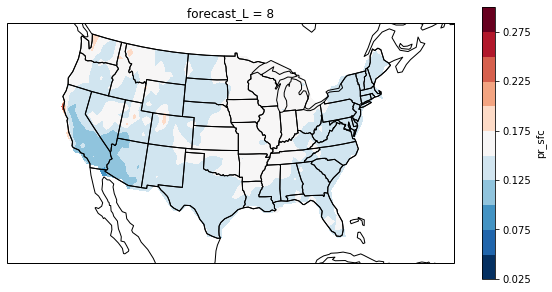

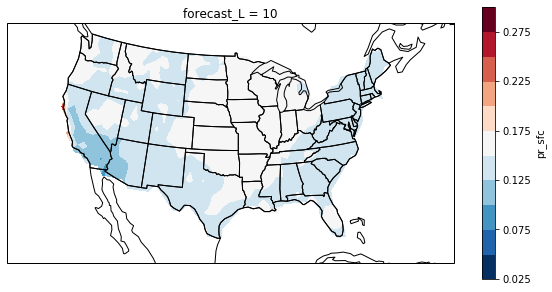

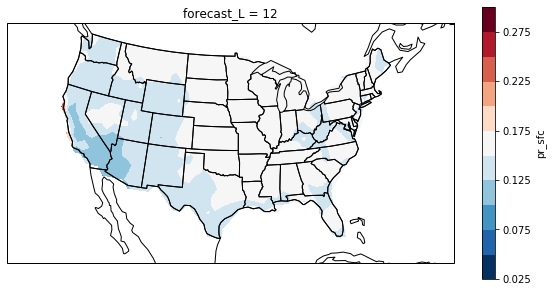

In [173]:
shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m',
                                         category='cultural', name=shapename)
plt.figure(figsize=(20,10))
for iL in np.arange(0,3):
    plt.figure(figsize=(10,5))
    ax = plt.subplot(111,projection=ccrs.LambertConformal(central_longitude=-95, central_latitude=45) )
    check_85_L0.mean('target_time').where(ds_mask.the_geom>0).isel(forecast_L=iL).plot.contourf( ax = ax,
                    zorder=-1, levels=np.arange(0.025, 0.325, 0.025), cmap = 'RdBu_r',
        origin='upper', transform=ccrs.PlateCarree(),
          extent=[-180, 180, -90, 90])
    # ax.stock_img()
    ax.coastlines()
    ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())
    ax.add_feature(cfeature.BORDERS)
    ax.add_geometries(
    shpreader.Reader(states_shp).geometries(),
    ccrs.PlateCarree(),
    facecolor='none', edgecolor='k')


<Figure size 1440x720 with 0 Axes>

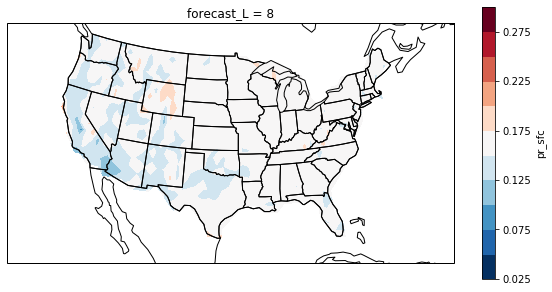

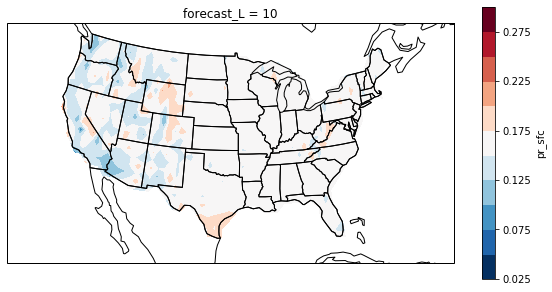

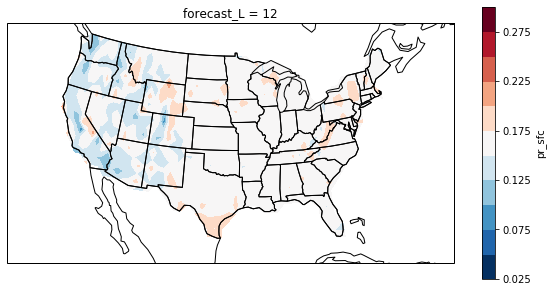

In [174]:
shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m',
                                         category='cultural', name=shapename)
plt.figure(figsize=(20,10))
for iL in np.arange(0,3):
    plt.figure(figsize=(10,5))
    ax = plt.subplot(111,projection=ccrs.LambertConformal(central_longitude=-95, central_latitude=45) )
    check_85_L1.mean('target_time').where(ds_mask.the_geom>0).isel(forecast_L=iL).plot.contourf( ax = ax,
                    zorder=-1, levels=np.arange(0.025, 0.325, 0.025), cmap = 'RdBu_r',
        origin='upper', transform=ccrs.PlateCarree(),
          extent=[-180, 180, -90, 90])
    # ax.stock_img()
    ax.coastlines()
    ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())
    ax.add_feature(cfeature.BORDERS)
    ax.add_geometries(
    shpreader.Reader(states_shp).geometries(),
    ccrs.PlateCarree(),
    facecolor='none', edgecolor='k')




<Figure size 1440x720 with 0 Axes>

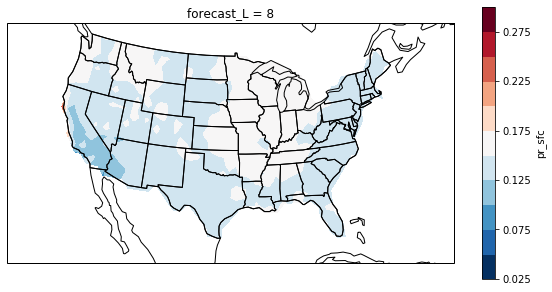

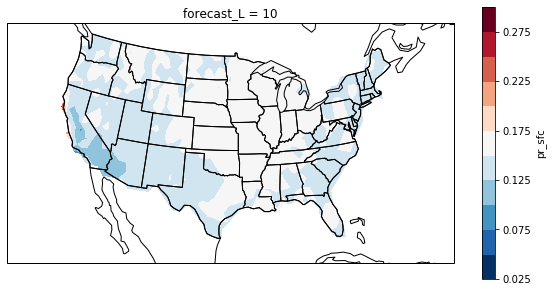

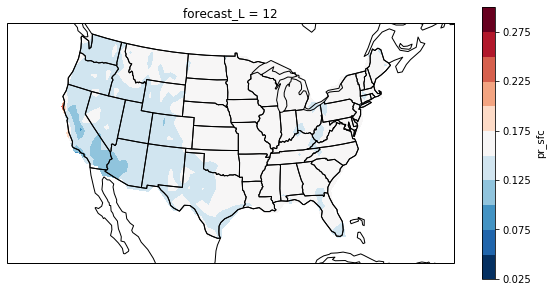

In [175]:
shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m',
                                         category='cultural', name=shapename)
plt.figure(figsize=(20,10))
for iL in np.arange(0,3):
    plt.figure(figsize=(10,5))
    ax = plt.subplot(111,projection=ccrs.LambertConformal(central_longitude=-95, central_latitude=45) )
    check_85_L3.mean('target_time').where(ds_mask.the_geom>0).isel(forecast_L=iL).plot.contourf( ax = ax,
                    zorder=-1, levels=np.arange(0.025, 0.325, 0.025), cmap = 'RdBu_r',
        origin='upper', transform=ccrs.PlateCarree(),
          extent=[-180, 180, -90, 90])
    # ax.stock_img()
    ax.coastlines()
    ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())
    ax.add_feature(cfeature.BORDERS)
    ax.add_geometries(
    shpreader.Reader(states_shp).geometries(),
    ccrs.PlateCarree(),
    facecolor='none', edgecolor='k')




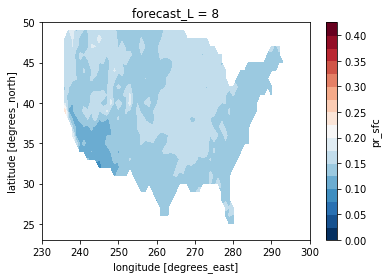

In [17]:
check_85_0.mean('target_time').where(ds_mask.the_geom>0).plot.contourf(
        levels=np.arange(0, 0.45, 0.025), cmap = 'RdBu_r')

In [66]:
check_85_1

<xarray.DataArray 'pr_sfc' (forecast_L: 3, target_time: 365, lat: 28, lon: 71)>
array([[[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        ...,

        [[nan, nan, nan, ..., 

In [ ]:
extent = [-120, -70, 20, 50.5]

g = t2m_terciles.plot(x = 'X', y = 'Y', col = 'quantile', figsize=(15,4), 
                      transform = proj_dta, subplot_kws={'projection':proj_map})
for ii, ax in enumerate(g.axes.flat):
    ax.add_feature(cfeature.STATES)
    ax.coastlines()
    ax.set_extent(extent)


In [69]:
check_85_1.groupby('target_time.month').mean('target_time').where(ds_mask.the_geom>0).isel(forecast_L=iL)

<xarray.DataArray 'pr_sfc' (month: 12, lat: 28, lon: 71)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., 

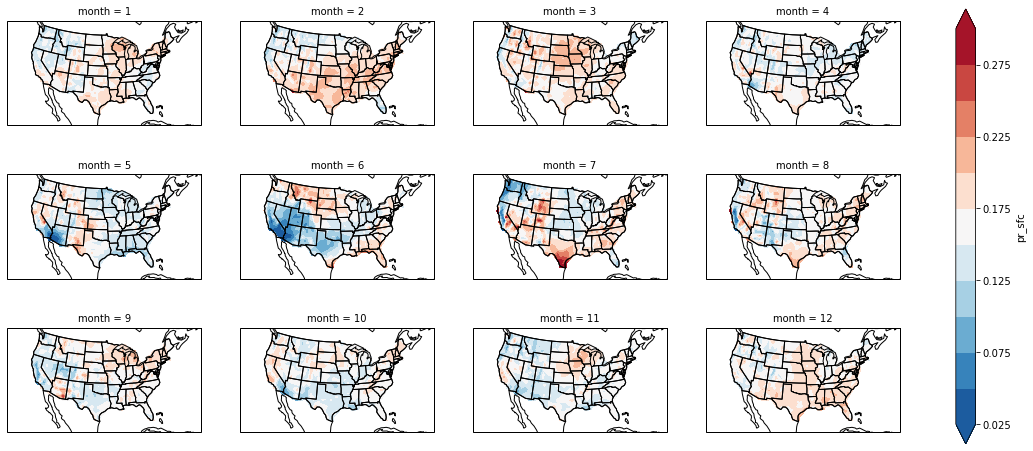

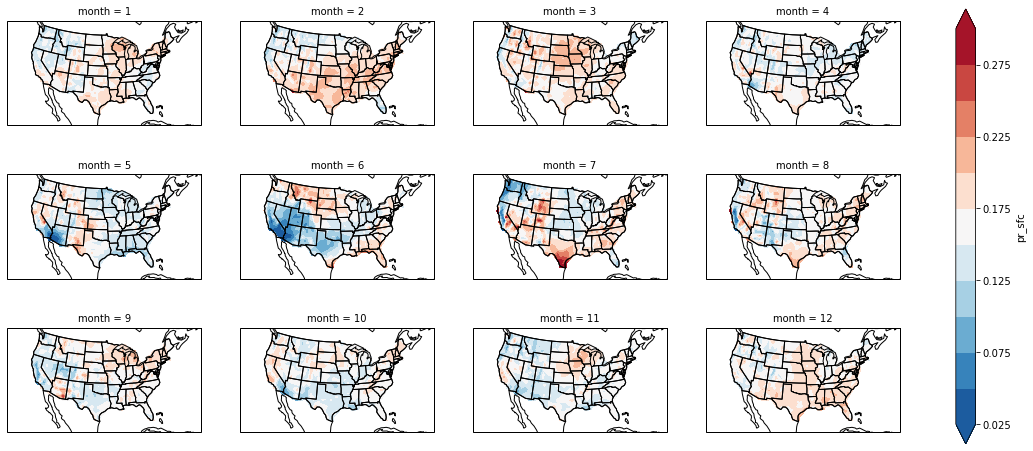

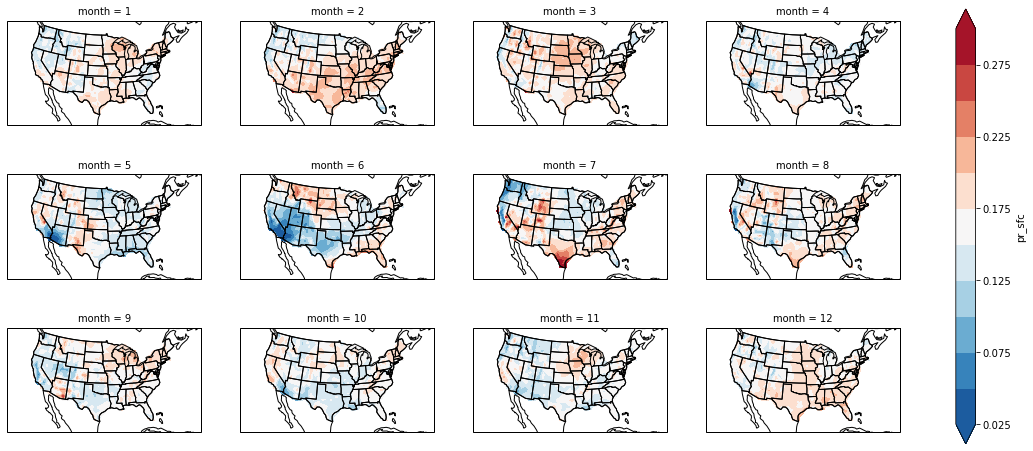

In [80]:
proj_map = ccrs.LambertConformal(central_longitude=-95, central_latitude=45)
proj_dta = ccrs.PlateCarree()  # the data's projection

for il in np.arange(0,3):
#     plt.figure(figsize=(10,5))
    g = check_85_1.groupby('target_time.month').mean('target_time').where(ds_mask.the_geom>0).isel(forecast_L=iL).plot.contourf( 
        col='month', col_wrap=4, figsize=(20,8),
        zorder=-1, levels=np.arange(0.025, 0.325, 0.025), cmap = 'RdBu_r',
        origin='upper', transform = proj_dta, subplot_kws={'projection':proj_map}, 
#         add_colorbar=False
    )
    # ax.stock_img()
#     plt.subplots_adjust(wspace=0.01,hspace=0.2)

    for ii, ax in enumerate(g.axes.flat):
        ax.coastlines()
        ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())
        ax.add_feature(cfeature.BORDERS)
        ax.add_geometries(
        shpreader.Reader(states_shp).geometries(),
        ccrs.PlateCarree(),
        facecolor='none', edgecolor='k')




In [ ]:
# BSS

In [86]:
ds_BSS=xr.open_dataarray('ds_BSS.nc')
ds_BSS

<xarray.DataArray (lat: 28, lon: 71)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float64 23.0 24.0 25.0 26.0 27.0 ... 46.0 47.0 48.0 49.0 50.0
  * lon      (lon) float64 230.0 231.0 232.0 233.0 ... 297.0 298.0 299.0 300.0

In [125]:
ds_BSS_p=xr.open_dataarray('ds_BSS_predict.nc')
ds_BSS_p

<xarray.DataArray (lat: 28, lon: 71)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float64 23.0 24.0 25.0 26.0 27.0 ... 46.0 47.0 48.0 49.0 50.0
  * lon      (lon) float64 230.0 231.0 232.0 233.0 ... 297.0 298.0 299.0 300.0

Text(0.5, 1.0, 'BSS')

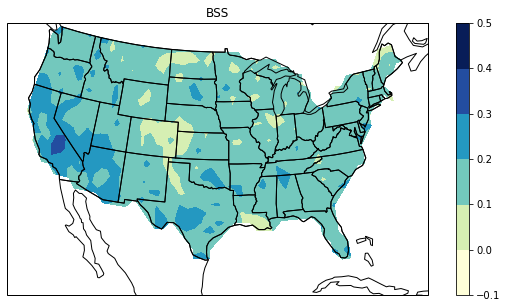

In [132]:
ttp = ds_BSS.where(ds_mask.the_geom>0.1)
plt.figure(figsize=(10,5))
ax = plt.subplot(111,projection=ccrs.LambertConformal(central_longitude=-95, central_latitude=45) )
ttp.plot.contourf(cmap='YlGnBu',levels=7,
                 ax = ax,  transform=ccrs.PlateCarree(), vmin=-0.1, vmax=0.5
          )
# ax.stock_img()
ax.coastlines()
ax.set_extent([-120, -72, 20, 50], ccrs.Geodetic())
ax.add_feature(cfeature.BORDERS)
ax.add_geometries(
shpreader.Reader(states_shp).geometries(),
ccrs.PlateCarree(),
facecolor='none', edgecolor='k')
plt.title('BSS')

Text(0.5, 1.0, 'BSS')

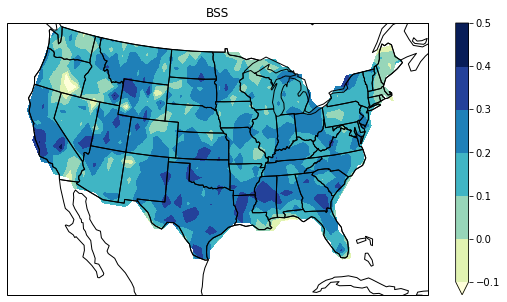

In [133]:
ttp = ds_BSS_p.where(ds_mask.the_geom>0.1)
plt.figure(figsize=(10,5))
ax = plt.subplot(111,projection=ccrs.LambertConformal(central_longitude=-95, central_latitude=45) )
ttp.plot.contourf(cmap='YlGnBu',levels=7,
                 ax = ax,  transform=ccrs.PlateCarree(), vmin=-0.1, vmax=0.5
          )
# ax.stock_img()
ax.coastlines()
ax.set_extent([-120, -72, 20, 50], ccrs.Geodetic())
ax.add_feature(cfeature.BORDERS)
ax.add_geometries(
shpreader.Reader(states_shp).geometries(),
ccrs.PlateCarree(),
facecolor='none', edgecolor='k')
plt.title('BSS')

In [124]:
ds_BSS_month=xr.open_dataset('ds_BSS_month.nc').rename({'__xarray_dataarray_variable__':'BSS'})
ds_BSS_month

<xarray.Dataset>
Dimensions:  (lat: 28, lon: 71, month: 12)
Coordinates:
  * lon      (lon) float64 230.0 231.0 232.0 233.0 ... 297.0 298.0 299.0 300.0
  * lat      (lat) float64 23.0 24.0 25.0 26.0 27.0 ... 46.0 47.0 48.0 49.0 50.0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    BSS      (month, lat, lon) float64 ...

In [127]:
ds_BSS_month_predict=xr.open_dataset('ds_BSS_month_predict.nc').rename({'__xarray_dataarray_variable__':'BSS'})
ds_BSS_month_predict

<xarray.Dataset>
Dimensions:  (lat: 28, lon: 71, month: 12)
Coordinates:
  * lon      (lon) float64 230.0 231.0 232.0 233.0 ... 297.0 298.0 299.0 300.0
  * lat      (lat) float64 23.0 24.0 25.0 26.0 27.0 ... 46.0 47.0 48.0 49.0 50.0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    BSS      (month, lat, lon) float64 ...

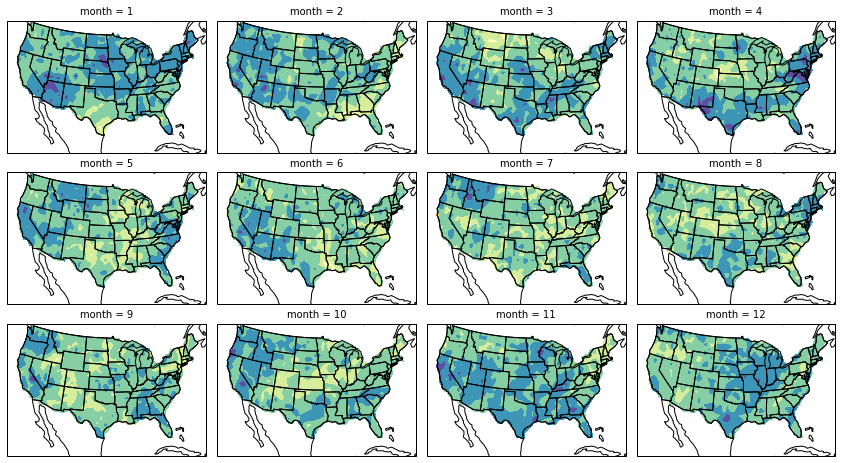

In [159]:
g = ds_BSS_month.BSS.plot.contourf( 
    col='month', col_wrap=4, figsize=(15,8),
    zorder=-1, cmap='Spectral',levels=9, vmax=1, vmin = -1,
    origin='upper', transform = proj_dta, subplot_kws={'projection':proj_map}, 
        add_colorbar=False
)
plt.subplots_adjust(wspace=0.01,hspace=0.15)

for ii, ax in enumerate(g.axes.flat):
    ax.coastlines()
    ax.set_extent([-120, -73, 20, 50], ccrs.Geodetic())
    ax.add_feature(cfeature.BORDERS)
    ax.add_geometries(
    shpreader.Reader(states_shp).geometries(),
    ccrs.PlateCarree(),
    facecolor='none', edgecolor='k')



In [146]:
ds_BSS_month_predict.BSS.min()

<xarray.DataArray 'BSS' ()>
array(-1.24688965)

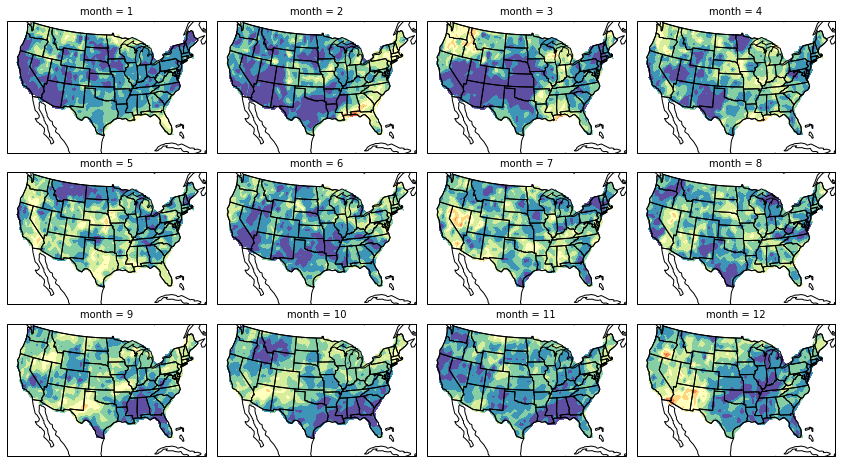

In [160]:
g = ds_BSS_month_predict.BSS.plot.contourf( 
    col='month', col_wrap=4, figsize=(15,8),
    zorder=-1, cmap='Spectral',levels=9, vmax=1, vmin = -1,
    origin='upper', transform = proj_dta, subplot_kws={'projection':proj_map}, 
        add_colorbar=False
)
plt.subplots_adjust(wspace=0.01,hspace=0.15)

for ii, ax in enumerate(g.axes.flat):
    ax.coastlines()
    ax.set_extent([-120, -73, 20, 50], ccrs.Geodetic())
    ax.add_feature(cfeature.BORDERS)
    ax.add_geometries(
    shpreader.Reader(states_shp).geometries(),
    ccrs.PlateCarree(),
    facecolor='none', edgecolor='k')



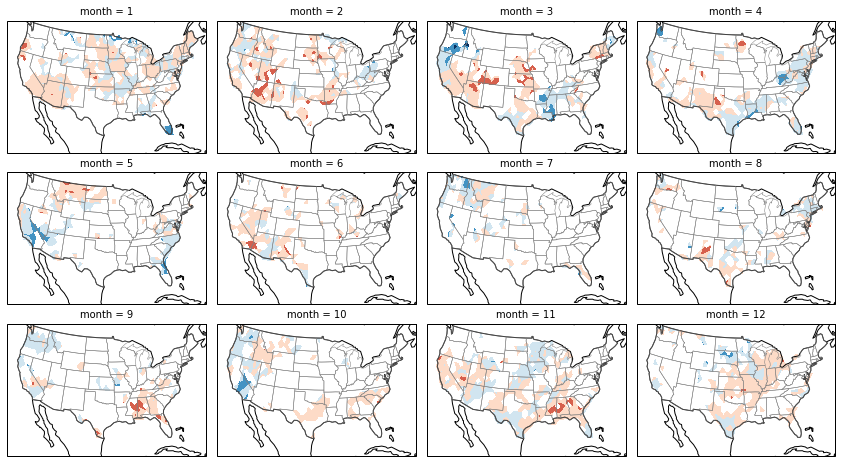

In [168]:
g = (ds_BSS_month_predict.BSS-ds_BSS_month.BSS).where((ds_BSS_month.BSS>0.2)).plot.contourf( 
    col='month', col_wrap=4, figsize=(15,8),
    zorder=-1, cmap='RdBu_r',
    origin='upper', transform = proj_dta, subplot_kws={'projection':proj_map}, 
        add_colorbar=False
)
plt.subplots_adjust(wspace=0.01,hspace=0.15)

for ii, ax in enumerate(g.axes.flat):
    ax.coastlines()
    ax.set_extent([-120, -73, 20, 50], ccrs.Geodetic())
    ax.add_feature(cfeature.BORDERS)
    ax.add_geometries(
    shpreader.Reader(states_shp).geometries(),
    ccrs.PlateCarree(),
    facecolor='none', edgecolor='grey', lw=0.5)



In [ ]:
for ilat in np.arange(25,51,3):
    for ilon in np.arange(235,301,10):
        if np.sum(np.isnan(ds_mask.the_geom.where(ds_mask.the_geom>0).sel(lat=ilat, lon=ilon).values))==0:
            plt.figure(figsize=(10,3))
            ax = plt.subplot(121)
            check_85.pr_sfc[:,:,:,:].sel(lat=ilat, lon=ilon).plot.line(ax = ax, x='target_time')
            ax = plt.subplot(122)
#             smooth_clim_soft.pr_sfc[:,:,:,:].sel(lat=ilat, lon=ilon).plot.line('b',ax=ax,x='target_clim')
            ds_clim_test_3d_all.where(ds_mask.the_geom>0).pr_sfc[:,:,-1,:,:].sel(lat=ilat, lon=ilon).plot.line(ax=ax,x='target_clim')
            smooth_clim_cauchy.pr_sfc[:,:,:,:].sel(lat=ilat, lon=ilon).plot.line('k',ax=ax,x='target_clim')
